## Multi class

In [1]:
import sys
sys.path.insert(0, '..')

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from activation import TanH, Sigmoid, ReLU, Softmax
from enums import GradientDescentMode
from linear import Linear
from loss import MSELoss, CELoss, BCELoss, HingeLoss
from sequential import Sequential
from optimizers import SGD
from utils import onehot_encoding

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Iris

In [31]:
iris = datasets.load_iris()

print('Nombre d exemples :', len(iris.data))
print('Nombre de features :', len(iris.feature_names))
print('Nombre de classes :', len(iris.target_names))

Nombre d exemples : 150
Nombre de features : 4
Nombre de classes : 3


In [32]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.2)
print('Données d apprentissage :', X_train.shape, y_train.shape)
print('Données de test :', X_test.shape, y_test.shape)

Données d apprentissage : (120, 4) (120,)
Données de test : (30, 4) (30,)


In [33]:
y_train_onehot = onehot_encoding(y_train, 3)
y_test_onehot = onehot_encoding(y_test, 3)
print('One hot train :', y_train_onehot.shape)
print('One hot test :', y_test_onehot.shape)

One hot train : (120, 3)
One hot test : (30, 3)


In [34]:
def eval_fn(net, X_test, y_test):
    y_pred = net(X_test).argmax(1)
    y_test = y_test.argmax(1)
    return np.mean(y_pred == y_test)

In [35]:
net = Sequential(
    Linear(4, 10),
    ReLU(),
    Linear(10, 3),
)

lr = 1e-1
epochs = 1_000
loss = CELoss()
all_loss, all_loss_valid, all_acc_valid, best_parameters = SGD(
    net,
    loss,
    lr,
    X_train,
    y_train_onehot,
    epochs,
    GradientDescentMode.BATCH,
    -1,
    eval_fn,
    X_test,
    y_test_onehot,
)

Train : -----------------------------------
Epoch 100: train loss: 0.29187476675735596 val loss: 0.37174039071551107 val eval_fn: 0.7333333333333333
Epoch 200: train loss: 0.19311335871165064 val loss: 0.22168728440975455 val eval_fn: 0.9
Epoch 300: train loss: 0.15957018902443518 val loss: 0.16417619075639753 val eval_fn: 0.9333333333333333
Epoch 400: train loss: 0.0959970342949565 val loss: 0.06762148515741821 val eval_fn: 0.9666666666666667
Epoch 500: train loss: 0.081375455819868 val loss: 0.05166120748887732 val eval_fn: 1.0
Epoch 600: train loss: 0.08436544835602529 val loss: 0.05983855785180873 val eval_fn: 0.9666666666666667
Epoch 700: train loss: 0.0779410118932235 val loss: 0.05342629607582846 val eval_fn: 0.9666666666666667
Epoch 800: train loss: 0.07427211199184722 val loss: 0.05071712172495179 val eval_fn: 0.9666666666666667
Epoch 900: train loss: 0.07187322864942794 val loss: 0.04942432066466805 val eval_fn: 0.9666666666666667
Epoch 1000: train loss: 0.06986335973324156 v

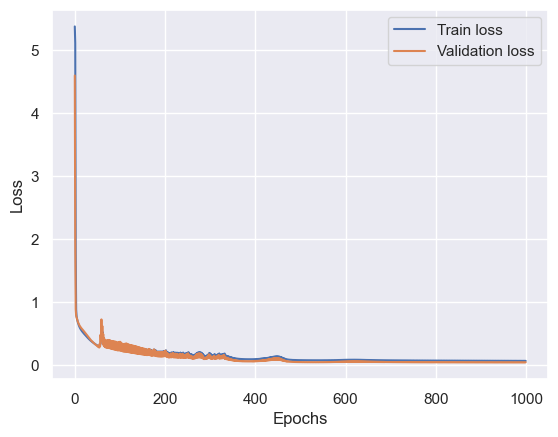

In [36]:
plt.plot(all_loss, label='Train loss')
plt.plot(all_loss_valid, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

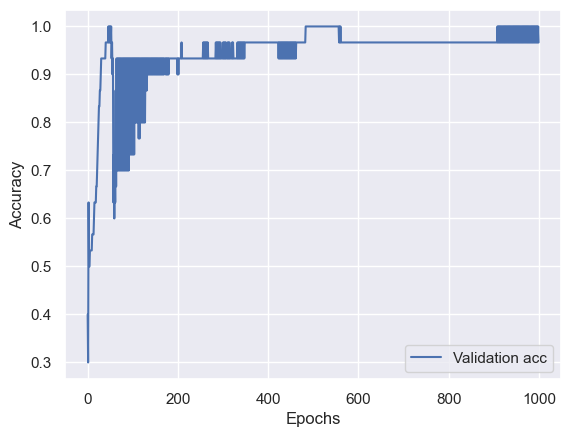

In [37]:
plt.plot(all_acc_valid, label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [38]:
eval_fn(net, X_train, y_train_onehot)

0.975

In [39]:
def plot_confusion_matrix(net, X, y):
    y_pred = net(X).argmax(1)
    cm = confusion_matrix(y, y_pred)
    sns.set(font_scale=1)
    sns.heatmap(cm, annot=True, annot_kws={"size": 10}, cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

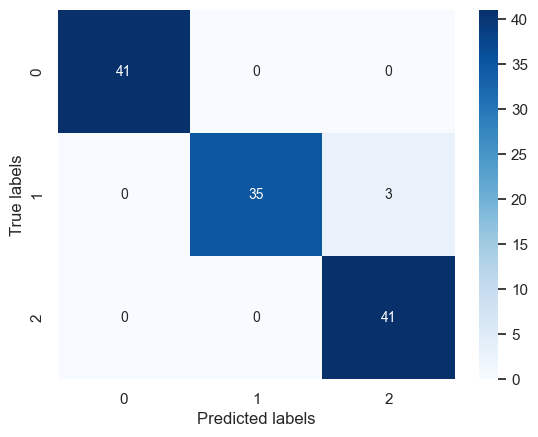

In [40]:
plot_confusion_matrix(net, X_train, y_train)

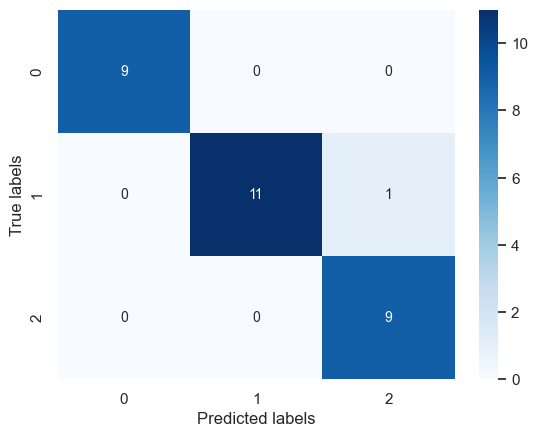

In [41]:
plot_confusion_matrix(net, X_test, y_test)

### Digits

In [42]:
digits = datasets.load_digits()

print('Nombre d exemples :', len(digits.data))
print('Nombre de features :', len(digits.feature_names))
print('Nombre de classes :', len(digits.target_names))

Nombre d exemples : 1797
Nombre de features : 64
Nombre de classes : 10


In [43]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=.2)
print('Données d apprentissage :', X_train.shape, y_train.shape)
print('Données de test :', X_test.shape, y_test.shape)

Données d apprentissage : (1437, 64) (1437,)
Données de test : (360, 64) (360,)


In [44]:
y_train_onehot = onehot_encoding(y_train, 10)
y_test_onehot = onehot_encoding(y_test, 10)
print('One hot train :', y_train_onehot.shape)
print('One hot test :', y_test_onehot.shape)

One hot train : (1437, 10)
One hot test : (360, 10)


In [45]:
net = Sequential(
    Linear(64, 100),
    ReLU(),
    Linear(100, 100),
    ReLU(),
    Linear(100, 10),
)

lr = 1e-1
epochs = 1_000
loss = CELoss()
all_loss, all_loss_valid, all_acc_valid, best_parameters = SGD(
    net,
    loss,
    lr,
    X_train,
    y_train_onehot,
    epochs,
    GradientDescentMode.BATCH,
    -1,
    eval_fn,
    X_test,
    y_test_onehot,
)

Train : -----------------------------------
Epoch 100: train loss: 0.03674277521985055 val loss: 0.10545765157713292 val eval_fn: 0.9777777777777777
Epoch 200: train loss: 0.013326566197884852 val loss: 0.09259796041362936 val eval_fn: 0.9805555555555555
Epoch 300: train loss: 0.00731555277102176 val loss: 0.09002084299966956 val eval_fn: 0.9805555555555555
Epoch 400: train loss: 0.004814867285789785 val loss: 0.08907022573358174 val eval_fn: 0.9805555555555555
Epoch 500: train loss: 0.0034994825393512103 val loss: 0.08881378558591263 val eval_fn: 0.9805555555555555
Epoch 600: train loss: 0.0027050929720373383 val loss: 0.08873070965585694 val eval_fn: 0.9833333333333333
Epoch 700: train loss: 0.002187228771778022 val loss: 0.0889459728636775 val eval_fn: 0.9833333333333333
Epoch 800: train loss: 0.0018246911519008394 val loss: 0.08925360219855547 val eval_fn: 0.9833333333333333
Epoch 900: train loss: 0.0015560858891109982 val loss: 0.08958639691937798 val eval_fn: 0.9833333333333333
E

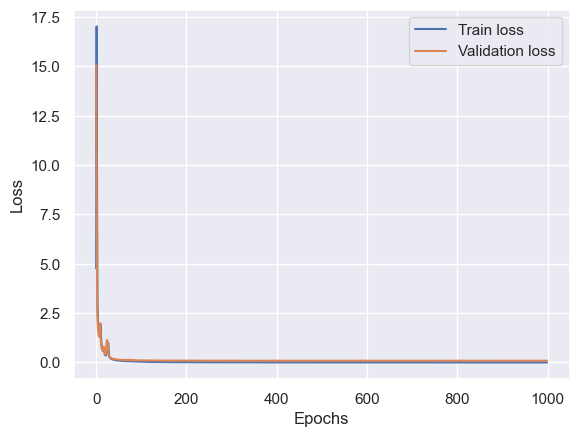

In [46]:
plt.plot(all_loss, label='Train loss')
plt.plot(all_loss_valid, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

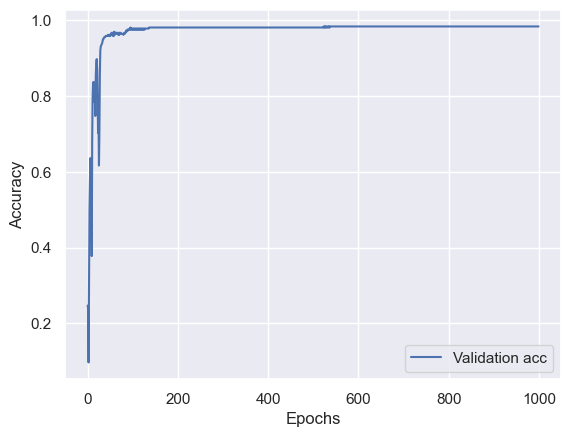

In [47]:
plt.plot(all_acc_valid, label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [48]:
eval_fn(net, X_train, y_train_onehot)

1.0

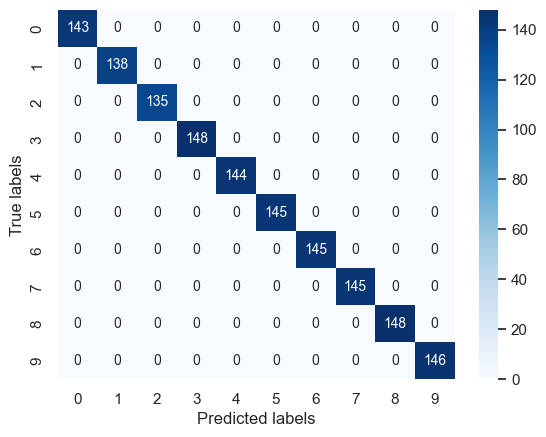

In [49]:
plot_confusion_matrix(net, X_train, y_train)

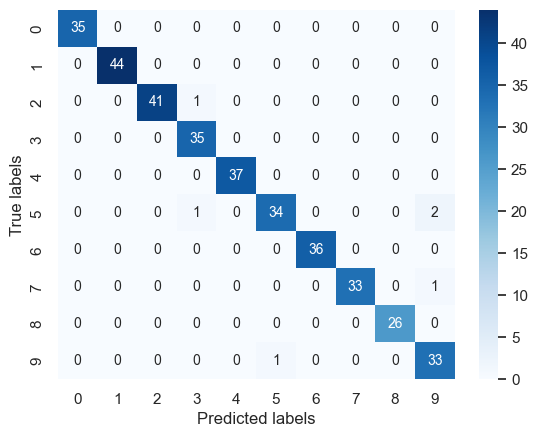

In [50]:
plot_confusion_matrix(net, X_test, y_test)